In [20]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize

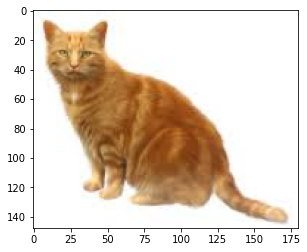

In [45]:
img = plt.imread("Data/Dog_and_Cat/Cat/55.jpg")
plt.imshow(img)

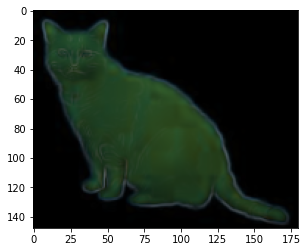

In [46]:
edges = filters.sobel(img)
plt.imshow(edges)

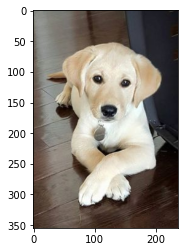

In [25]:
img = plt.imread("Data/Dog_and_Cat/Dog/5.jpg")
plt.imshow(img)

In [26]:
from skimage import io, filters

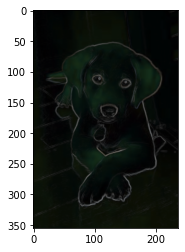

In [27]:
edges = filters.sobel(img)
plt.imshow(edges)

In [33]:
def load_image_files(container_path, dimension=(64, 64)):
    
    """Loading Multiple Images From the Folder and Which Consists  of Different Shape of Data We Have to Bring them in 64 ,64 Shape
    as well as 
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to the main folder holding one subfolder[Cat,Dog] 
    Each and Every category[Cat, Dog]
    Dimensions: We Have Bring Ddifferent Images into Same equal shape
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr ="""cat and Dog Image Classification Problem"""
    
    images = []
    flat_data = []
    target = []
    
    for i,direc in enumerate(folders):
        for file in direc.iterdir():
            # Before Converting 
            img = skimage.io.imread(file)
            plt.imshow(img)
            #plt.show()
            
            # After Converting  Image Sahpe in 64 ,64
            img_resized =resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    
    return Bunch(data=flat_data,
                target=target,
                target_name = categories,
                images= images,
                DESCR =descr )

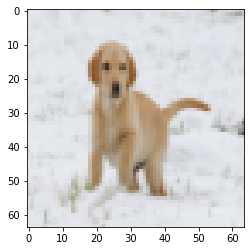

In [48]:
import skimage
image_dataset = load_image_files("Data/Dog_and_Cat/")

In [35]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_name', 'images', 'DESCR'])

In [36]:
image_dataset.data

array([[0.1828125 , 0.11372549, 0.0573223 , ..., 0.65306373, 0.5314951 ,
        0.36211703],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99129902],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       ...,
       [0.47242647, 0.64691234, 0.22745098, ..., 0.83137255, 0.81176471,
        0.78615196],
       [0.47242647, 0.64691234, 0.22745098, ..., 0.83137255, 0.81176471,
        0.78615196],
       [0.87331495, 0.8828125 , 0.90242034, ..., 0.90196078, 0.91372549,
        0.93333333]])

In [37]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

|Target|Lables|
|----|------|
|Cat|0|
|Dog|1|

In [39]:
image_dataset.target_name

['Cat', 'Dog']

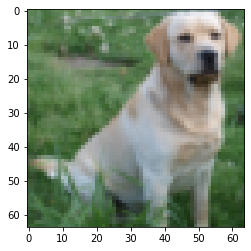

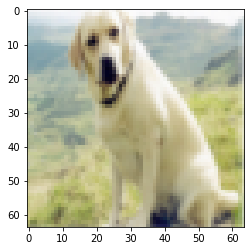

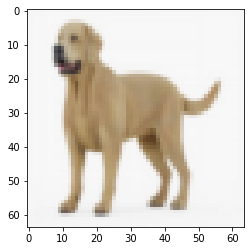

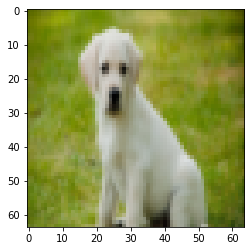

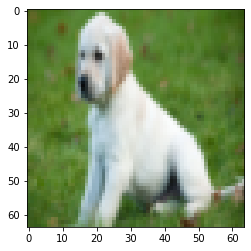

In [52]:
for I in range(130,135):
    plt.imshow(image_dataset.images[I])
    plt.show()

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=1)
x_train.shape

(110, 12288)

In [56]:
x_test.shape

(37, 12288)

In [58]:
y_train.shape

(110,)

### Task :
1. Apply Logistic, bayes, Knn
2. Apply Classification Report 
3. apply Confusion matrix
4. Roc and Auc Curves